In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.neural_networks import bisensory_nn
from src.utils import *

In [2]:
n_sensory = 2
n_cortex = 2
n_motor = 1
learning_rate = 1e-2
time = 100
input_fluctuation_rate = 0.2

light_strength = 0.5

global id
id = 0

bsnn = bisensory_nn(n_sensory, n_cortex, n_motor)

for neuron in bsnn:
    neuron.input_fluctuation_rate = input_fluctuation_rate

## Normal Rearing

In [3]:
bsnn.add_input(
    data0=(np.ones((n_sensory, 1)) * light_strength).flatten(),
    data1=(np.ones((n_sensory, 1)) * light_strength).flatten(),
)

recording = bsnn.dynamic(time, learning_rate=learning_rate, is_record=True)
sensory1, cortex1, motor1 = record_splitter(recording, "bisensory")

<Axes: >

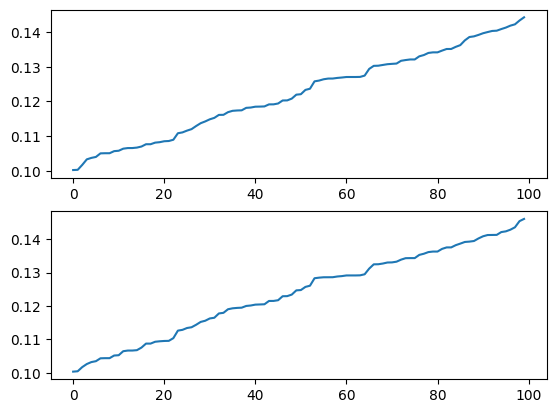

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex1, ax1, presynaptic_neuron_id=range(n_sensory))
plot_weight_value(cortex1, ax2, presynaptic_neuron_id=range(n_sensory, 2*n_sensory))

## Monocular Deprivation

In [5]:
bsnn.add_input(
    data0=(np.ones((n_sensory, 1)) * light_strength).flatten(),
    data1=np.zeros((n_sensory, 1)).flatten(),
)

recording = bsnn.dynamic(time, learning_rate=learning_rate, is_record=True)
sensory2, cortex2, motor2 = record_splitter(recording, "bisensory")

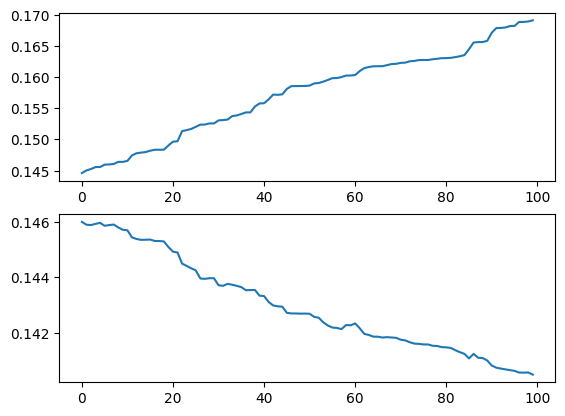

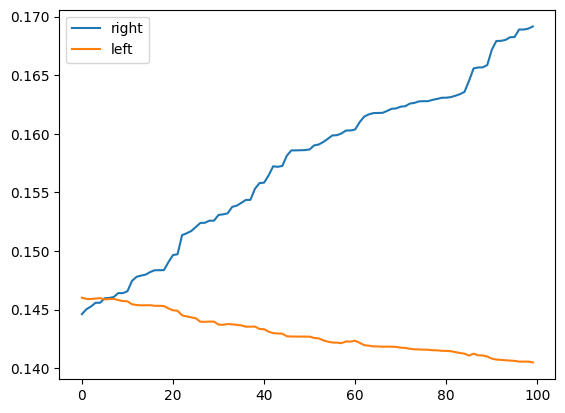

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex2, ax1, presynaptic_neuron_id=range(n_sensory))
plot_weight_value(cortex2, ax2, presynaptic_neuron_id=range(n_sensory, 2*n_sensory))


fig, ax = plt.subplots()
plot_weight_value(cortex2, ax, presynaptic_neuron_id=range(n_sensory), label="right")
plot_weight_value(cortex2, ax, presynaptic_neuron_id=range(n_sensory, 2*n_sensory), label="left")
ax.legend()

## Binocular Deprivation

In [7]:
bsnn.add_input(
    data0=np.zeros((n_sensory, 1)).flatten(),
    data1=np.zeros((n_sensory, 1)).flatten(),
)

recording = bsnn.dynamic(time, learning_rate=learning_rate, is_record=True)
sensory3, cortex3, motor3 = record_splitter(recording, "bisensory")

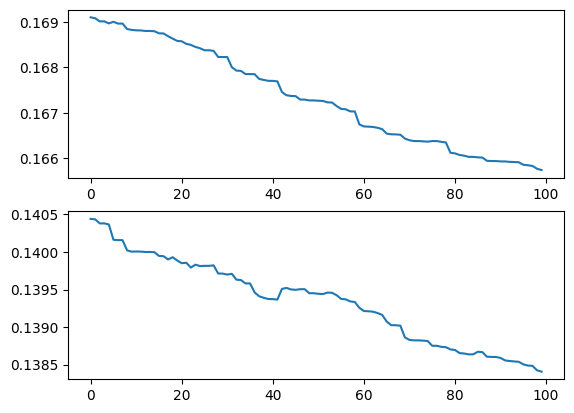

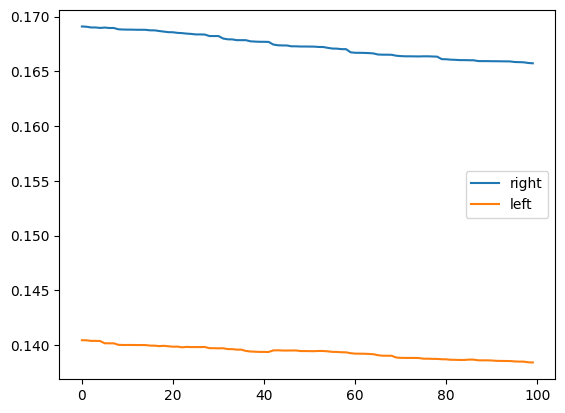

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex3, ax1, presynaptic_neuron_id=range(n_sensory))
plot_weight_value(cortex3, ax2, presynaptic_neuron_id=range(n_sensory, 2*n_sensory))


fig, ax = plt.subplots()
plot_weight_value(cortex3, ax, presynaptic_neuron_id=range(n_sensory), label="right")
plot_weight_value(cortex3, ax, presynaptic_neuron_id=range(n_sensory, 2*n_sensory), label="left")
ax.legend()

## Reverse suture

In [9]:
time = 150

In [10]:
bsnn.add_input(
    data0=np.zeros((n_sensory, 1)).flatten(),
    data1=(np.ones((n_sensory, 1)) * light_strength).flatten(),
)

recording = bsnn.dynamic(time, learning_rate=learning_rate, is_record=True)
sensory4, cortex4, motor4 = record_splitter(recording, "bisensory")

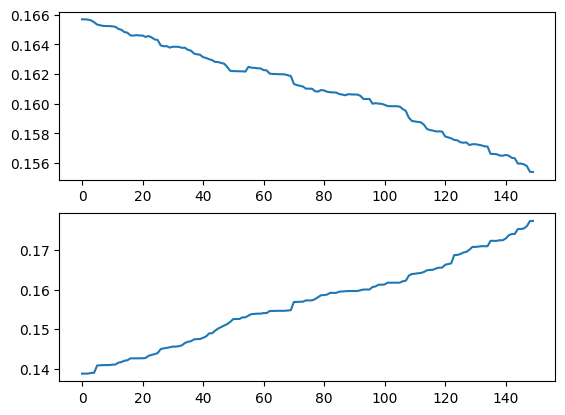

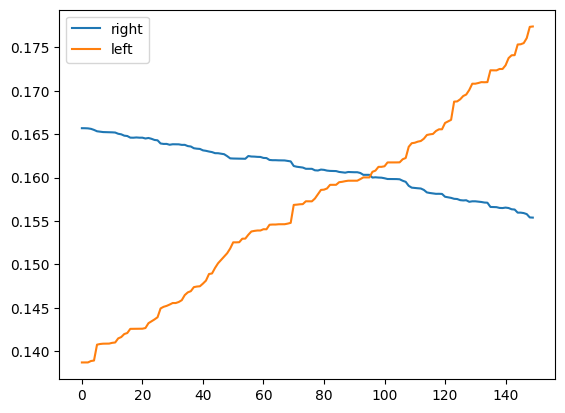

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex4, ax1, presynaptic_neuron_id=range(n_sensory))
plot_weight_value(cortex4, ax2, presynaptic_neuron_id=range(n_sensory, 2*n_sensory))


fig, ax = plt.subplots()
plot_weight_value(cortex4, ax, presynaptic_neuron_id=range(n_sensory), label="right")
plot_weight_value(cortex4, ax, presynaptic_neuron_id=range(n_sensory, 2*n_sensory), label="left")
ax.legend()

## Binocular Recovery

In [12]:
# time = 200

In [13]:
bsnn.add_input(
    data0=(np.ones((n_sensory, 1)) * light_strength).flatten(),
    data1=(np.ones((n_sensory, 1)) * light_strength).flatten(),
)

recording = bsnn.dynamic(time, learning_rate=learning_rate, is_record=True)
sensory5, cortex5, motor5 = record_splitter(recording, "bisensory")

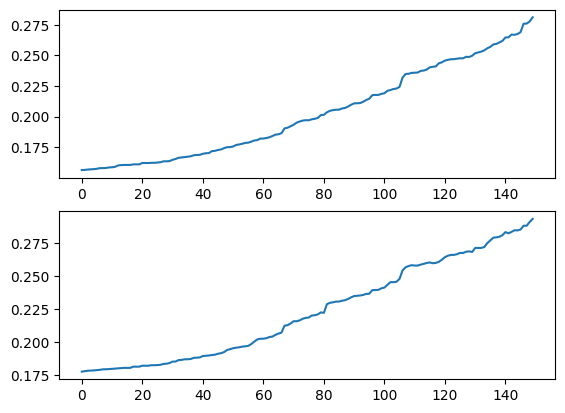

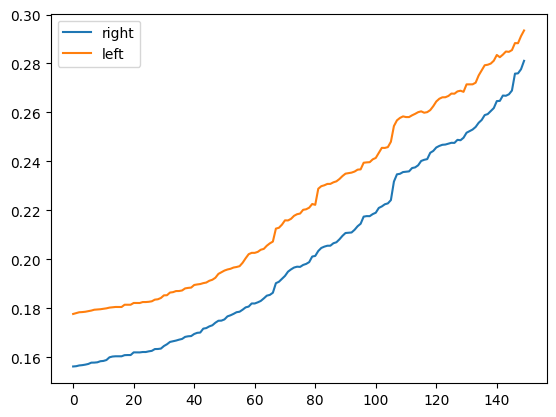

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex5, ax1, presynaptic_neuron_id=range(n_sensory))
plot_weight_value(cortex5, ax2, presynaptic_neuron_id=range(n_sensory, 2*n_sensory))


fig, ax = plt.subplots()
plot_weight_value(cortex5, ax, presynaptic_neuron_id=range(n_sensory), label="right")
plot_weight_value(cortex5, ax, presynaptic_neuron_id=range(n_sensory, 2*n_sensory), label="left")
ax.legend()

Text(465, 0.25, 'Binocular\nRecovery')

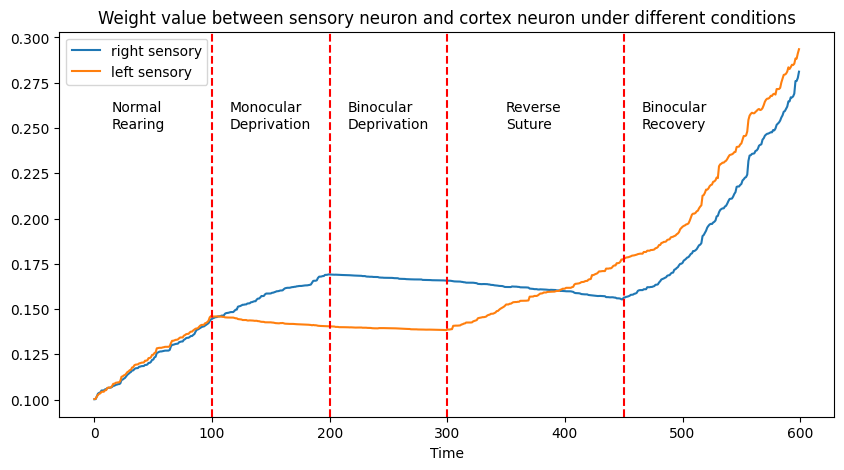

In [51]:
cortex = [*cortex1, *cortex2, *cortex3, *cortex4, *cortex5]

fig, ax = plt.subplots(figsize=(10, 5))
plot_weight_value(
    cortex, ax, presynaptic_neuron_id=range(n_sensory), label="right sensory"
)
plot_weight_value(
    cortex,
    ax,
    presynaptic_neuron_id=range(n_sensory, 2 * n_sensory),
    label="left sensory",
)
ax.legend()
ax.set_title(
    "Weight value between sensory neuron and cortex neuron under different conditions"
)
ax.set_xlabel("Time")

ax.axvline(x=100, color="r", linestyle="--")
ax.axvline(x=200, color="r", linestyle="--")
ax.axvline(x=300, color="r", linestyle="--")
ax.axvline(x=450, color="r", linestyle="--")

# put some words between the red line on the plot
ax.text(15, 0.25, "Normal\nRearing")
ax.text(115, 0.25, "Monocular\nDeprivation")
ax.text(215, 0.25, "Binocular\nDeprivation")
ax.text(350, 0.25, "Reverse\nSuture")
ax.text(465, 0.25, "Binocular\nRecovery")